In [51]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("EyesOpenShut")
y_train = list(int(y) for y in y_train)
y_test = list(int(y) for y in y_test)

In [52]:
import iisignature as sig
from sklearn.linear_model import LogisticRegression
for level in range(1,5):
    arr = []
    arr_test = []
    for i in range(len(X_train)):
        arr.append(sig.sig(X_train[i], level))
    for i in range(len(X_test)):
        arr_test.append(sig.sig(X_test[i], level))
    clf = LogisticRegression(solver="sag")
    clf.fit(arr, y_train)
    print(level)
    print(clf.score(arr_test,y_test))
    

C:\Python\GithubRepos\M2R\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\GithubRepos\M2R\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\GithubRepos\M2R\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1
0.42857142857142855
2
0.5714285714285714
3
0.40476190476190477
4
0.5476190476190477


C:\Python\GithubRepos\M2R\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [53]:
import iisignature as sig
from sklearn.linear_model import LogisticRegression
arr = []
arr_test = []
for i in range(len(X_train)):
    arr.append(sig.sig(X_train[i], 2))
for i in range(len(X_test)):
    arr_test.append(sig.sig(X_test[i], 2))

mu  = np.mean(arr, axis = 0)
sigma  = np.std(arr, axis = 0)
arr = (arr - mu) / sigma
arr_test = (arr_test - mu) / sigma

In [54]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
for i in range(1,20):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.47619047619047616
0.5
0.42857142857142855
0.40476190476190477
0.38095238095238093
0.4523809523809524
0.40476190476190477
0.5238095238095238
0.47619047619047616
0.5238095238095238
0.5238095238095238
0.5238095238095238
0.5238095238095238
0.5
0.5
0.5
0.5
0.5
0.5


In [55]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.47619047619047616


C:\Python\GithubRepos\M2R\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


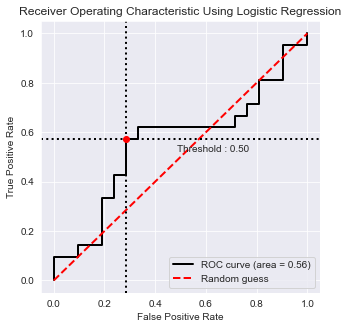

score is 0.6428571428571429


In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(arr, y_train)
y_pred = clf.predict_proba(arr_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(arr_test, y_test)
print("score is " + str(score))

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
LG = LogisticRegression(solver='saga')
# parameters = {"solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"),
#               "C" : (0.1,0.5,1,5,10)}
parameters = {'penalty': ('l1', 'l2', 'none'), "C" : (0.1,0.5,1,5,10)}
clf = GridSearchCV(LG, parameters, n_jobs=8)
clf.fit(arr, y_train)
sorted(clf.cv_results_.keys())
clf.score(arr_test, y_test)

0.5

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


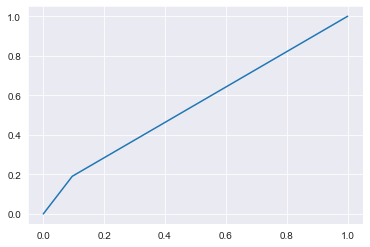

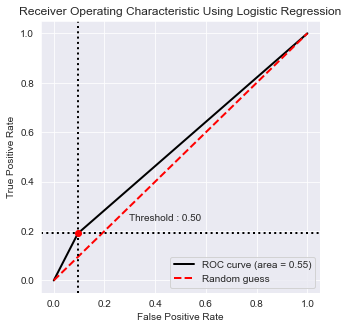

score is 0.5476190476190477


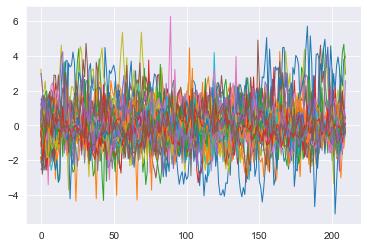

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(arr, y_train)
y_pred = clf.predict(arr_test)
print(y_pred)
print(y_test)
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
from sklearn.metrics import accuracy_score

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = accuracy_score(y_test, y_pred)
print("score is " + str(score))

for i in arr:
    plt.plot(range(len(i)), i,linewidth = 1.0, linestyle = '-')

plt.show()


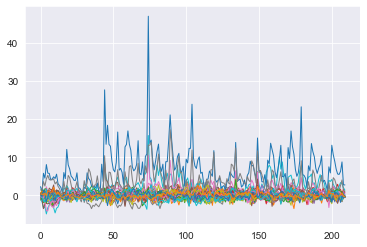

In [59]:

for i in arr_test:
    plt.plot(range(len(i)), i,linewidth = 1.0, linestyle = '-')
plt.show()


In [60]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':range(1,11), 'gamma': ('scale', 'auto')}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, scoring='accuracy')
clf.fit(arr, y_train)
sorted(clf.cv_results_.keys())
res = clf.score(arr_test, y_test)
print(res)

0.5476190476190477


In [61]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(arr, y_train)
    print(knn_clf.score(arr_test,y_test))

0.5476190476190477
0.6190476190476191
0.5714285714285714
0.5714285714285714
0.5476190476190477
0.5
0.5238095238095238
0.5476190476190477
0.5476190476190477


In [62]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)
model = clf.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_test)[:,1]

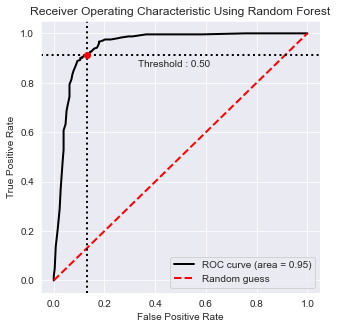

In [64]:
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Random Forest")
plt.show()

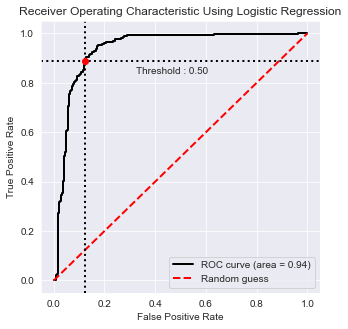

In [65]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0)
model = clf.fit(X_train, y_train)
# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()

In [66]:
import tslearn
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset("MotorImagery")

In [67]:
from tslearn.svm import TimeSeriesSVC
clf = TimeSeriesSVC(C=1.0, kernel="gak")
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
X_train_new = []
for i in range(len(X_train)):
    x = TimeSeriesScalerMeanVariance().fit_transform(np.transpose(X_train[0]))
    X_train_new.append(x.reshape([14,128]))
    

X_test_new = []
for i in range(len(X_test)):
    x = TimeSeriesScalerMeanVariance().fit_transform(np.transpose(X_test[0]))
    X_test_new.append(x.reshape([14,128]))
    
    
print(sig.sig(X_train_new[0], 2))
print(sig.sig(X_train_new[1], 2))

In [ ]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
for i in range(1,20):
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=i)
    knn.fit(X_train_new, y_train)
    print(knn.score(X_test_new, y_test))

In [ ]:
import iisignature as sig
from sklearn.linear_model import LogisticRegression
arr = []
arr_test = []
for i in range(len(X_train_new)):
    arr.append(sig.sig(X_train_new[i], 2))
for i in range(len(X_test_new)):
    arr_test.append(sig.sig(X_test_new[i], 2))
    
print(arr)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="sag")
clf.fit(arr, y_train)
y_pred = clf.predict_proba(arr_test)[:,1]
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.title("Receiver Operating Characteristic Using Logistic Regression")
plt.show()
score = clf.score(arr_test, y_test)
print("score is " + str(score))

In [ ]:
X_train_new[0]